In [2]:
from icecream import ic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Problematic of our dataset : revenues based upon the online shoppers intention

In [3]:
dataset = pd.read_csv("online_shoppers_intention.csv")
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Data Processing

In [5]:
dataset.dropna(inplace=True) # no null values found
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
#normalizing the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dataset[['Administrative_Duration','Informational_Duration','ProductRelated_Duration']] = scaler.fit_transform(dataset[['Administrative_Duration','Informational_Duration','ProductRelated_Duration']])

In [7]:
dataset[["BounceRates", "ExitRates", "PageValues", "SpecialDay"]] = scaler.fit_transform(dataset[["BounceRates", "ExitRates", "PageValues", "SpecialDay"]])

In [8]:
dataset.head(100)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,1.000000,1.000000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,0.001000,0.000000,0.500000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,1.000000,1.000000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,0.000042,0.250000,0.700000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,0.009809,0.100000,0.250000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.0,0,0.0,2,0.000516,0.000000,0.500000,0.0,0.2,Feb,1,1,1,3,Returning_Visitor,False,False
96,0,0.0,0,0.0,6,0.024487,0.250000,0.333333,0.0,0.2,Feb,1,1,1,3,Returning_Visitor,False,False
97,0,0.0,0,0.0,4,0.001641,0.000000,0.125000,0.0,0.6,Feb,1,1,1,4,Returning_Visitor,False,False
98,0,0.0,1,0.0,7,0.000782,0.190476,0.404762,0.0,0.6,Feb,2,4,1,7,Returning_Visitor,False,False


# Visualizing

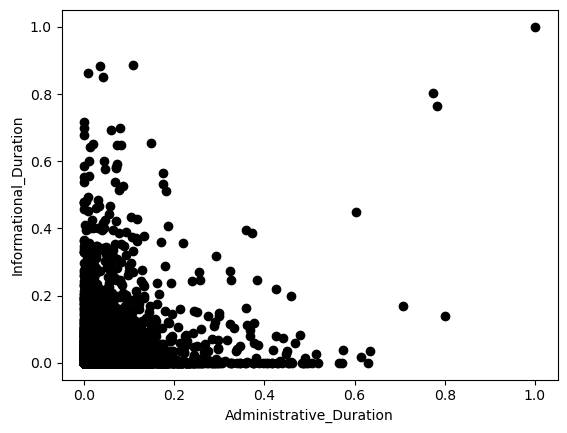

In [9]:
plt.plot(dataset['Administrative_Duration'], dataset['Informational_Duration'], 'o', color='black');
plt.xlabel('Administrative_Duration')
plt.ylabel('Informational_Duration')
plt.show()

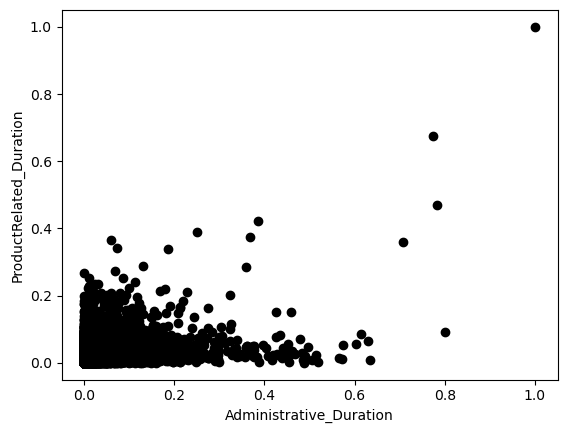

In [18]:
plt.plot(dataset['Administrative_Duration'], dataset['ProductRelated_Duration'], 'o', color='black');
plt.xlabel('Administrative_Duration')
plt.ylabel('ProductRelated_Duration')
plt.show()

c:\Users\charl\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


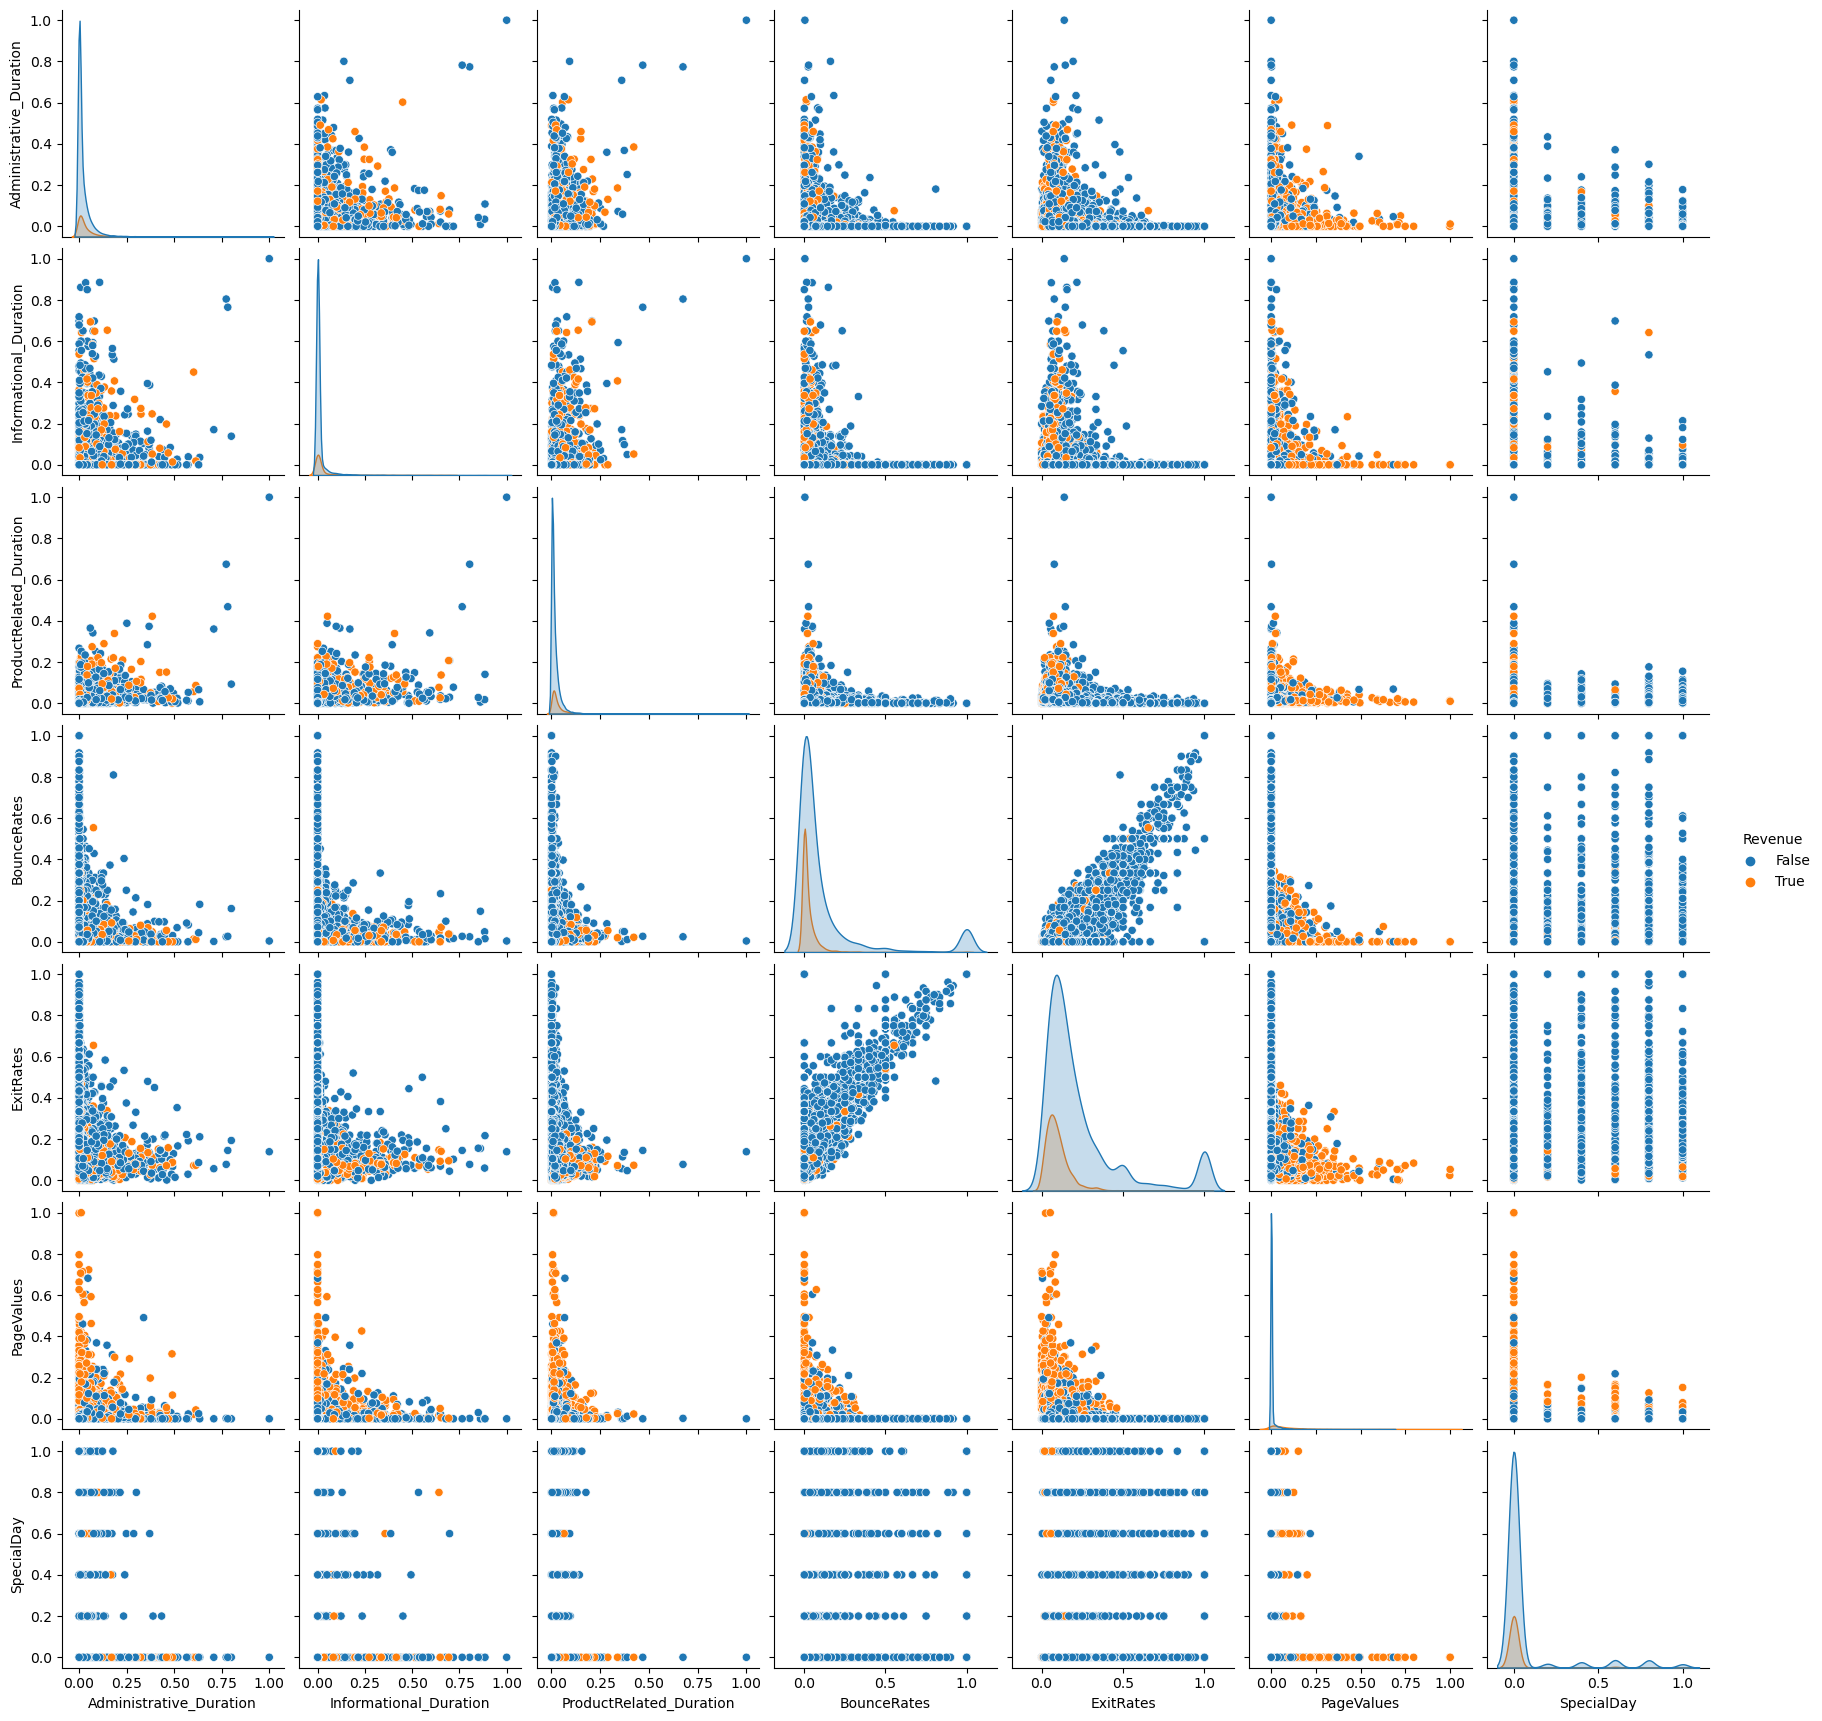

In [19]:
sns.pairplot(dataset, hue='Revenue', vars=['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'])
plt.show()

c:\Users\charl\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


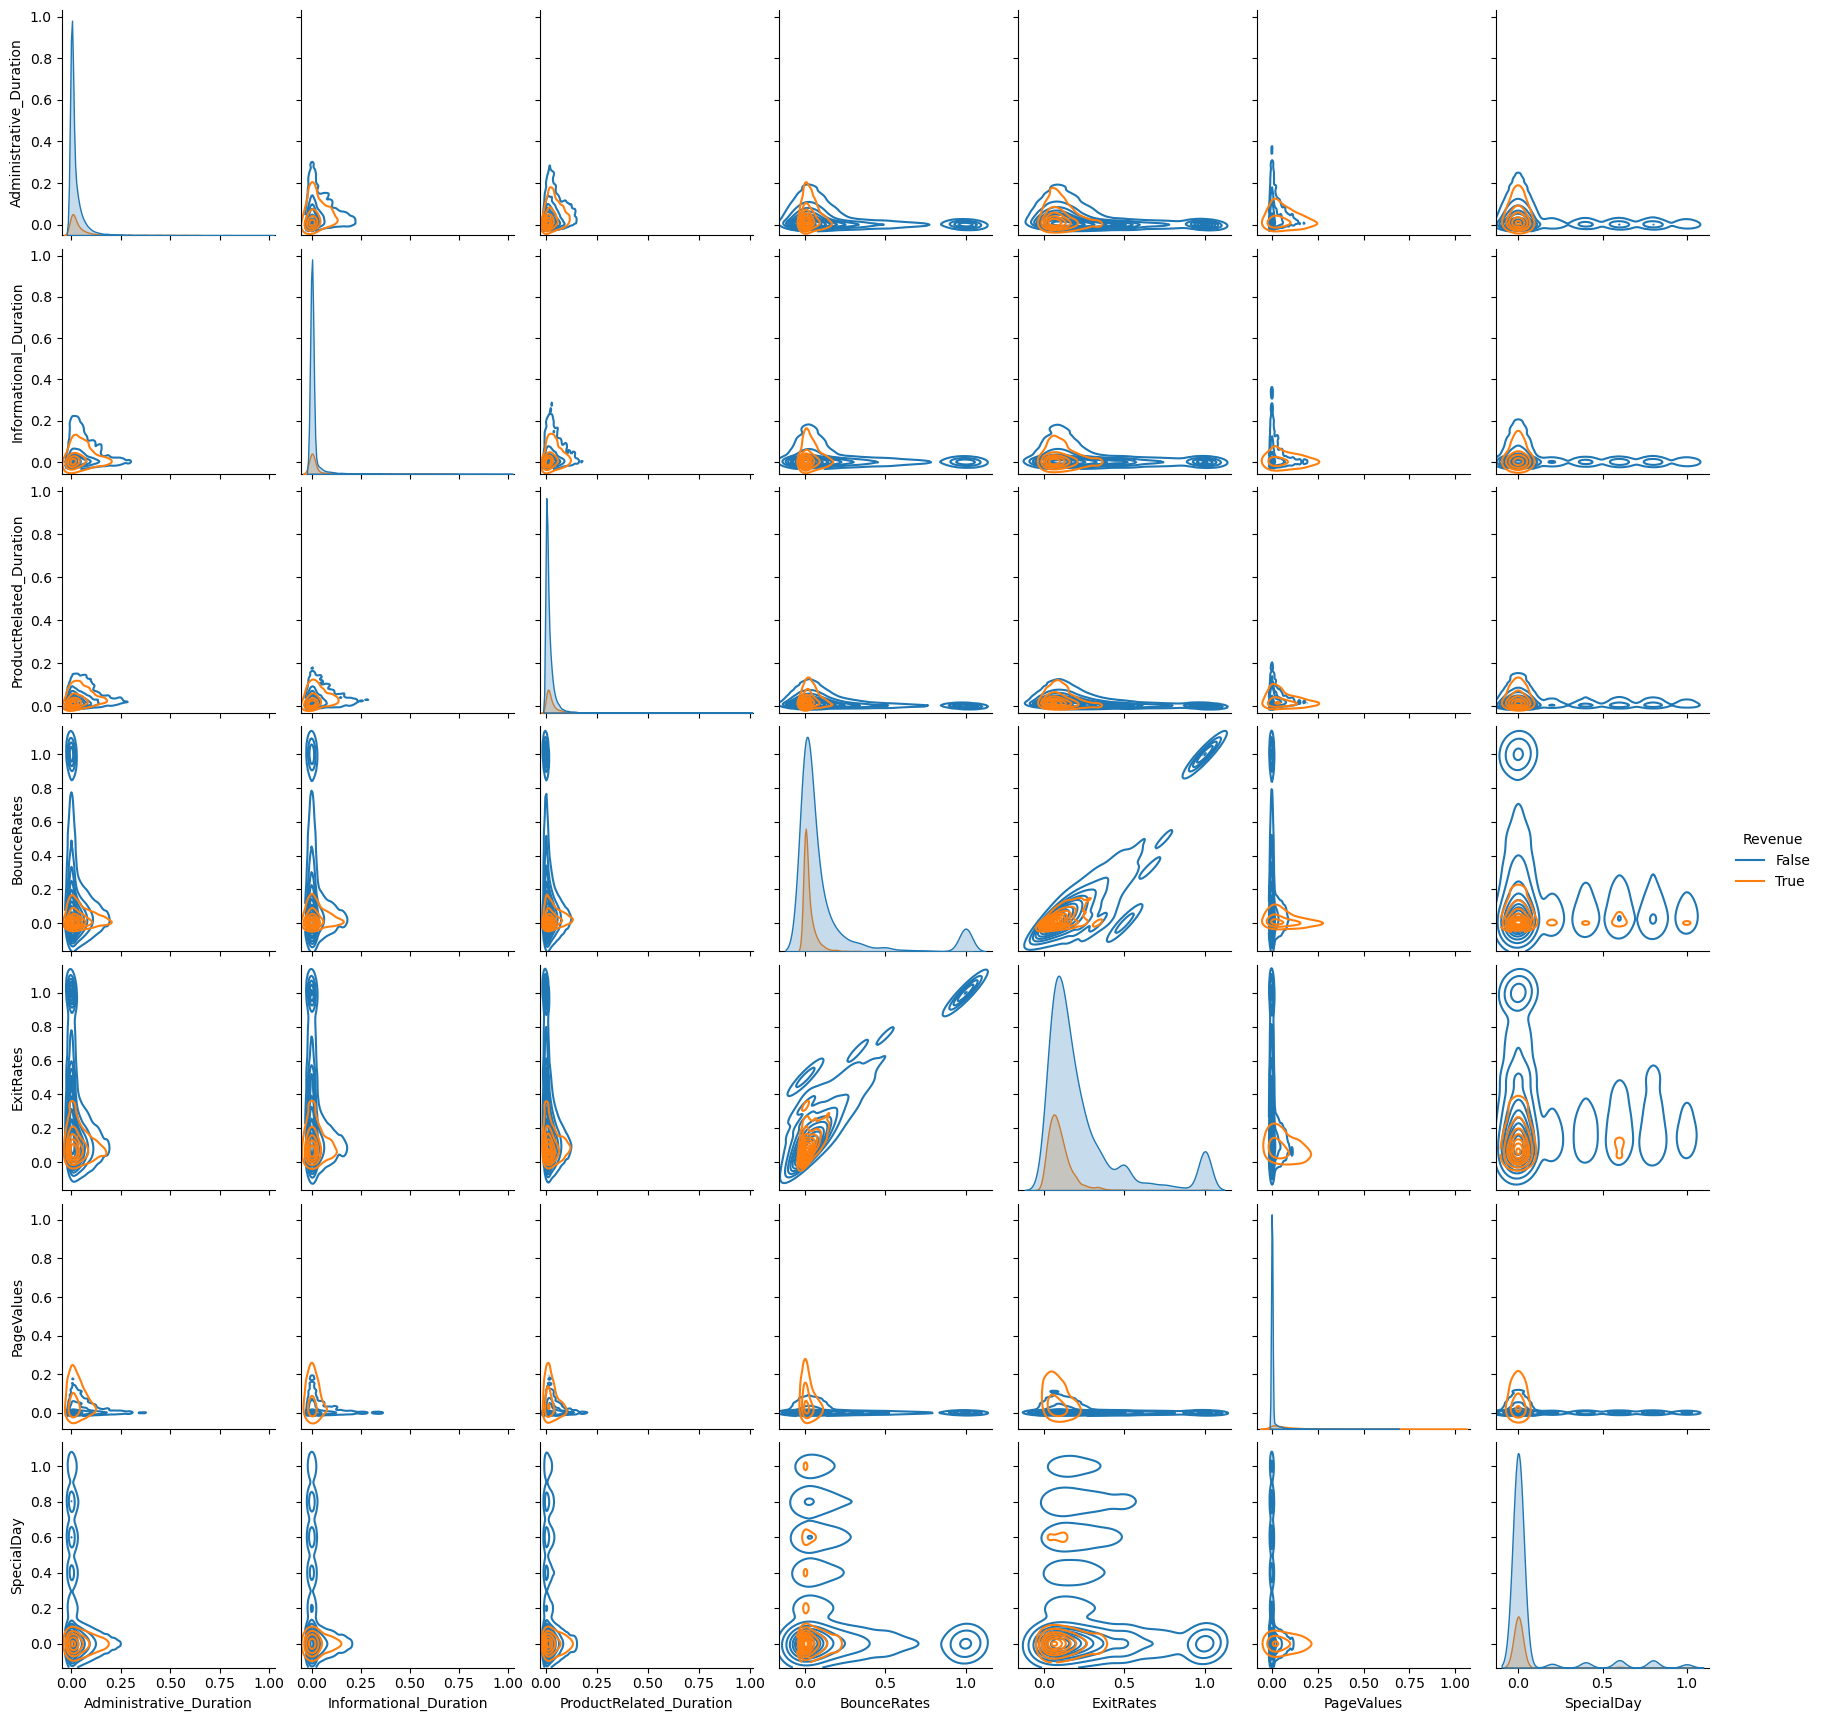

In [20]:
sns.pairplot(dataset, hue='Revenue', vars=['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'], kind = "kde")
plt.show()

# Training

In [21]:
# we are going to use dbscan and kmeans clustering algorithms to search for clusters in the dataset
from sklearn.cluster import DBSCAN, KMeans

dbscan = DBSCAN(eps=0.05, min_samples=5)
KMeans = KMeans(n_clusters=2)

dbscanned = dbscan.fit(dataset)
kmeaned = KMeans.fit(dataset)


ValueError: could not convert string to float: 'Feb'

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

c:\Users\charl\miniconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


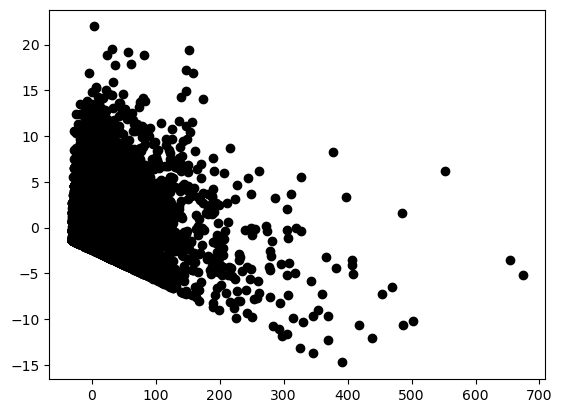

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca_dataset = dataset[["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay", "Weekend", "Revenue"]]
pca = PCA(n_components=2).fit(pca_dataset)
pca_2d = pca.transform(pca_dataset)

plt.plot(pca_2d[:, 0], pca_2d[:, 1], 'o', color=);